

---



---


#SVM Regression




---



---

SVM Regression, or Support Vector Machine Regression, is a supervised learning algorithm used for regression tasks. Unlike traditional regression techniques that try to minimize the error between the predicted and actual values, SVM Regression aims to fit as many instances as possible within a specified margin, while limiting margin violations. The margin here represents a threshold within which predictions are considered acceptable.

Documentation Links:
- [SVR Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)
- [LinearSVR Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html)


The objective of SVM Regression is to find a function that approximates the relationship between the input variables and the target variable while maintaining a balance between fitting the data well and keeping the margin violations low. This is achieved by minimizing a cost function that penalizes points outside the margin.




The code generates a synthetic dataset for regression

In [2]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
m = 50

# Generate feature matrix X of shape (m, 1) with random numbers between 0 and 2
X = 2 * np.random.rand(m, 1)

# True relationship: y = 4 + 3*X + random noise
# Generate target variable y with added random noise
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()


The code initializes a Support Vector Machine (SVM) regressor `svm_reg` with a linear kernel and an epsilon value of 1.5. It then trains the regressor on the provided data `X` and `y` using the `fit` method.

LinearSVR - Model Attributes:
- `epsilon` defins the margin of tolerance for errors in the training data.


In [3]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

Here we initializes two Support Vector Machine (SVM) regressors, `svm_reg1` and `svm_reg2`, with different epsilon values. It then trains these regressors on the provided data `X` and `y`. After training, it defines a function `find_support_vectors` to identify the support vectors for each regressor based on whether the predictions deviate from the actual values by more than the epsilon value. Finally, it calculates the prediction for a single input point (`eps_x1`) using `svm_reg1`.

In [4]:
# Initialize two Support Vector Machine regressors with different epsilon values
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)

# Train the SVM regressors on the data
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

# Function to find support vectors
def find_support_vectors(svm_reg, X, y):
    # Predict the target variable
    y_pred = svm_reg.predict(X)
    # Find instances where the prediction is off by more than the epsilon value
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    # Return the indices of these support vectors
    return np.argwhere(off_margin)

# Find support vectors for each SVM regressor
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# Prediction for a single input point using svm_reg1
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


This code defines a function `plot_svm_regression` to visualize the results of Support Vector Machine (SVM) regression. It plots the regression line predicted by the SVM regressor, along with the margin lines determined by the `epsilon` parameter. Additionally, it marks the support vectors used in the regression and plots the training data points. Finally, it creates two subplots to compare the results of two different SVM regression models with different `epsilon` values.

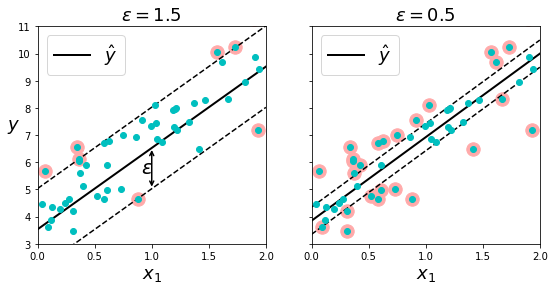

In [5]:
import matplotlib.pyplot as plt

def plot_svm_regression(svm_reg, X, y, axes):
    # Generate x values for plotting
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)

    # Predict y values using the SVM regressor
    y_pred = svm_reg.predict(x1s)

    # Plot the regression line
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")

    # Plot the margin lines
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")

    # Plot the support vectors
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')

    # Plot the training data points
    plt.plot(X, y, "co")

    # Set labels and legend
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)

    # Set axes limits
    plt.axis(axes)

# Create subplots for two plots
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# Plot the first SVM regression
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# Annotate the first plot with epsilon value
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

# Plot the second SVM regression
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

# Display the plots
plt.show()


This code generates synthetic data for polynomial regression. It creates a feature matrix `X` with `m` samples and one feature, where each feature value is a random number between -1 and 1. The target variable `y` is generated according to the true relationship

y = 0.2 + 0.1 * X + 0.5 * X^2 + random noise


where the noise is sampled from a normal distribution with mean 0 and standard deviation 0.1.

In [6]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Number of samples
m = 100

# Generate feature matrix X of shape (m, 1) with random numbers between -1 and 1
X = 2 * np.random.rand(m, 1) - 1

# True relationship: y = 0.2 + 0.1*X + 0.5*X^2 + random noise
# Generate target variable y with added random noise
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()


This code creates an SVR (Support Vector Regression) model for polynomial regression. The SVR model uses a polynomial kernel with a degree of 2, a regularization parameter `C` of 100, an epsilon value of 0.1, and the "scale" option for gamma. Then, it fits the SVR model to the data (`X` and `y`).

In [7]:
from sklearn.svm import SVR

# Create an SVR model for polynomial regression
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")

# Train the SVR model on the data
svm_poly_reg.fit(X, y)


SVR(C=100, degree=2, kernel='poly')

This code creates two Support Vector Regression (SVR) models with polynomial kernels. The first SVR model (`svm_poly_reg1`) has a degree of 2, a regularization parameter `C` of 100, and an epsilon value of 0.1. The second SVR model (`svm_poly_reg2`) also has a degree of 2, but with a smaller `C` value of 0.01. Both models use the "scale" option for gamma. Then, the code fits both SVR models to the data (`X` and `y`).

SVR- Model Attributes:
  - `kernel` specifies the kernel type used in the algorithm. Common choices include linear, polynomial, and radial basis function (RBF). Each kernel has different characteristics that affect the model's performance and complexity.

  - `degree` is applicable when the kernel is polynomial. It defines the degree of the polynomial kernel function, influencing the model's capacity to fit complex patterns in the data.
  
  - `C` is the regularization parameter that controls the trade-off between model simplicity (smoother decision boundary) and accuracy (correctly classifying training data points).
  
  - `epsilon` is the margin of tolerance for errors in the training data. It defines the size of the epsilon-tube within which no penalty is associated in the training loss function.

  - `gamma` is a parameter for RBF, poly, and sigmoid kernels. It defines the influence of a single training example, with low values meaning "far" and high values meaning "close."


In [8]:
from sklearn.svm import SVR

# Create two SVR models with polynomial kernel
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")

# Train the first SVR model on the data
svm_poly_reg1.fit(X, y)

# Train the second SVR model on the data
svm_poly_reg2.fit(X, y)


SVR(C=0.01, degree=2, kernel='poly')

This code creates a figure with two subplots and plots the results of two Support Vector Regression (SVR) models on each subplot. The details of each SVR model, including the degree of the polynomial kernel, the regularization parameter C, and the epsilon value, are displayed in the title of each subplot. The y-axis label is set to "y".

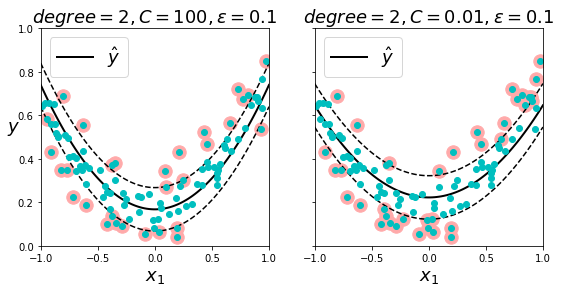

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# Plot the first SVR model
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# Plot the second SVR model
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

# Show the plot
plt.show()
